In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Assumptions of Simple Linear Regression (SLR)

---
<a id="assumptions"></a>

There are some critical assumptions involved in SLR that you must be aware of: 线性回归的重要假设

1. **Linearity:** $Y$ and $X$ must have an approximately linear relationship. x,y之间存在线性关系，可通过绘图判断
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any i != j. 
3. **Normality:** The errors (residuals) follow a Normal distribution. 残差应该符合正态分布。
4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)

The mnemonic **LINE** is a useful way to remember these four assumptions.

If all four assumptions are true, the following holds: 

$$ Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma) $$

> **Note:** $Y$ on its own is in general **not** normally distributed.

线性回归的参数估计，理论讲解视频，sigama估计量的求解方式
https://www.bilibili.com/video/BV1Ye411p7s1?from=search&seid=12958679504261149100

## Assumptions of MLR

---

Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_i$.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors**: The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$. 与SLR不同，这里要求特征们也要相互独立。

The mnemonic LINEI is a useful way to remember these five assumptions.

### Residual sum of squares (RSS)

As said above, we need a criterion to specify which straight line fits the data in the best possible way.

The most common way to define the "best fit line" is to ensure that our residuals (a.k.a. errors) are as close to zero as possible.

- We want to control the total amount of errors made.
- We want to give equal weight to errors of the same size which either overestimate or underestimate the true values.
- We consider single errors with larger magnitude as more important.


To take these points into account, we try to make the [residual sum of squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares), (or equivalently the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)) 


$${\rm RSS} = \sum_{i=1}^n \epsilon_i^2 =\sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

as small as possible.

### Following the terminology of optimization, the residual sum of squares is a particular type of **loss function** which we would like to minimize.

Note that there are alternative loss functions which one would seek to optimize. 
### Using the residual sum of squares is also referred to as using the **ordinary least squares** method.

如果你要是问我，为什么要用预测值与真实值之间的差值。因为想要需要比较两个Y值，必须有个不变的因子那就是X，在同一个X下比较两种Y才有意义。如果你又问，为什么要平方，那是因为两个Y值之间做差值总会有正负的性质，而这是一个距离问题，是一个标量，所以平方。

# 重要理解：
## 最小二乘法，实际上是在寻找最小残差平方的过程中，确定beta0和beta1的。

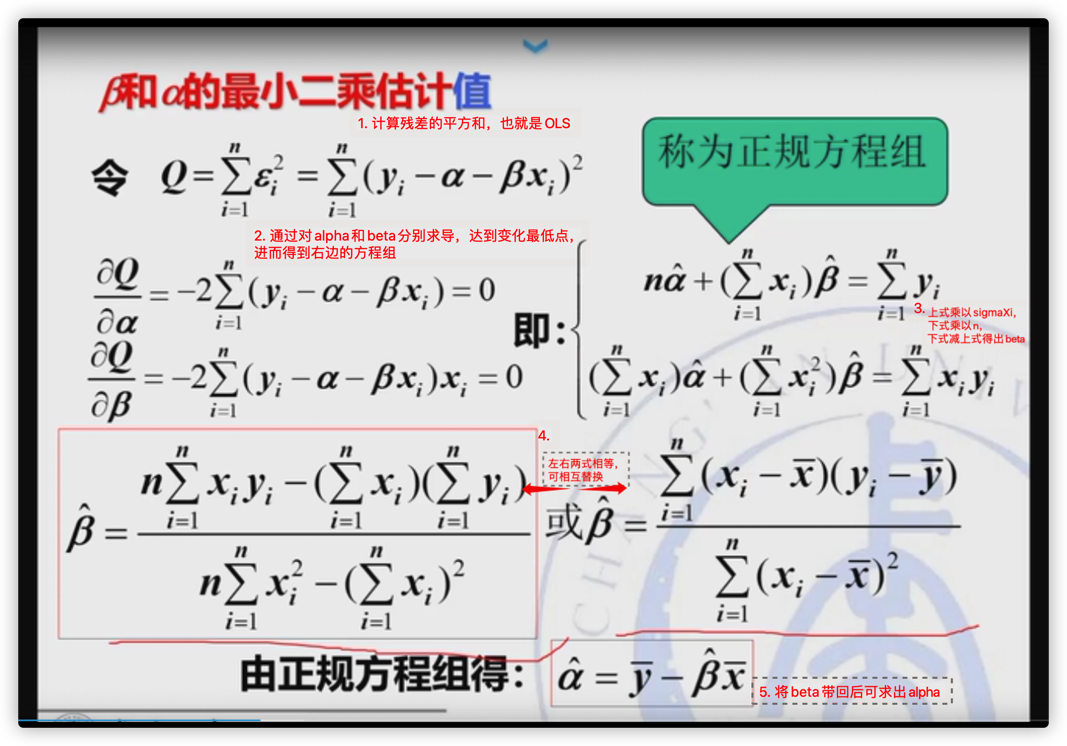

In [2]:
Image(filename='/Users/paxton615/Github_Personal/Notes/Linear_Regression/pics/最小二乘估计值.png')

### 线性回归的参数估计，理论讲解视频
https://www.bilibili.com/video/BV1Ye411p7s1?from=search&seid=12958679504261149100

### Minimizing the MSE
<a id="minimize-MSE"></a>

For simple linear regression based on the ordinary least squares method we can derive the intercept and slope that minimize the RSS algebraically (see either [here](OLS_derivation.ipynb) or [wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)). 

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

The equations for the intercept and slope that minimize the RSS are:

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} \\
\hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X}$$

Our simple linear regression is an **estimator of the expected value (mean) of $Y$** given $X$.

> **Note:** Estimators are mathematical functions or formulas that yield an *estimate*. For example, an estimator might be the sample mean whereas the estimate is the value of the sample mean from our data set.

### 内容中包含的两个公式就是化简后的最终估计量

通过ols计算MSE的过程

In [3]:
# create some random data
np.random.seed(1)
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))

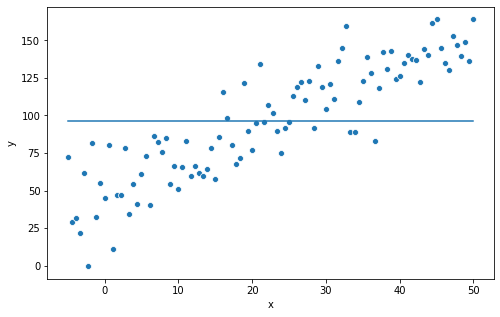

In [4]:
data = pd.DataFrame({'x':x, 'y':y})
fig,ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='x', y='y', data=data)
sns.lineplot(x ='x', y =96.211657, data=data) # 均值就是计算Variance的基础哦！别忘了
plt.show()

In [5]:
base_y = data.y.sum()/100 # 这里的baseline就是对目标值y求了一个平均数
data["base_y"]= base_y
data.head()

,x,y,base_y
0,-5.000000,72.486907,96.211657
1,-4.444444,28.875983,96.211657
2,-3.888889,31.658787,96.211657
3,-3.333333,21.873961,96.211657
4,-2.777778,61.752597,96.211657


#### 手动计算回归方程

In [6]:
# cook the ingredients
x_mean = data.x.mean()
y_mean = data.y.mean()
x_std = data.x.std()
y_std = data.y.std()
cov_xy = data.cov()
corr_xy = data.corr().iloc[0,1]

In [7]:
# get 
beta_1 = corr_xy*y_std/x_std
beta_0 = y_mean - beta_1*x_mean
print(beta_1)
print(beta_0)

2.120307150115456
48.5047461639162


In [8]:
data["y_cap"] = beta_0 + beta_1*data.x # 就是predict的预测结果
data["y_y_cap"] = data.y - data["y_cap"] # 真实值与预测结果的差距，即\epsilon 
data["y_y_squr"] = data["y_y_cap"]*data["y_y_cap"] # epsilon的平方
data.head()

,x,y,base_y,y_cap,y_y_cap,y_y_squr
0,-5.000000,72.486907,96.211657,37.903210,34.583697,1196.032088
1,-4.444444,28.875983,96.211657,39.081159,-10.205176,104.145617
2,-3.888889,31.658787,96.211657,40.259107,-8.600320,73.965505
3,-3.333333,21.873961,96.211657,41.437056,-19.563095,382.714677
4,-2.777778,61.752597,96.211657,42.615004,19.137593,366.247464


#### 用sklearn中的LR模型验证一下coef, intercept 和 y_cap

In [9]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(np.array(data['x']).reshape(-1,1), data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(lr.coef_)
print(lr.intercept_)
print(lr.predict([[-5]]))  # 均准确无误

[2.12030715]
48.50474616391619
[37.90321041]


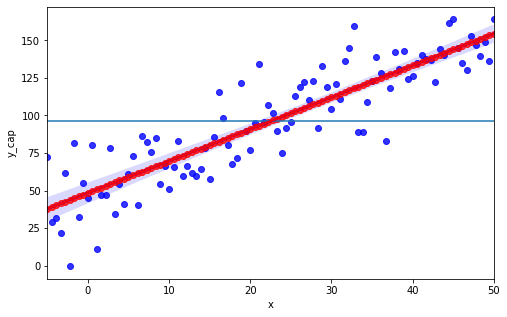

In [11]:
fig,ax = plt.subplots(figsize=(8,5))
# sns.scatterplot(x='x', y='y', data=data)
sns.lineplot(x ='x', y =96.211657, data=data)
sns.regplot(x = 'x', y = 'y', data= data, color='b')
sns.regplot(x = 'x', y = "y_cap", data= data, color='r')
plt.show()

#### MSE比较

In [12]:
data['y_mean'] = data['y'].sum()/len(data['y'])
data.head()
data.tail()

,x,y,base_y,y_cap,y_y_cap,y_y_squr,y_mean
95,47.777778,147.102357,96.211657,149.808310,-2.705953,7.322182,96.211657
96,48.333333,139.789593,96.211657,150.986258,-11.196665,125.365313,96.211657
97,48.888889,148.649715,96.211657,152.164207,-3.514492,12.351653,96.211657
98,49.444444,136.488872,96.211657,153.342155,-16.853283,284.033156,96.211657
99,50.000000,163.960641,96.211657,154.520104,9.440537,89.123739,96.211657


In [13]:
# 简单粗暴的OLD baseline MSE
mse_baseline = np.square(data['y']-data['y_mean']).mean()
print(mse_baseline)

1465.8647237633775


In [14]:
mse = np.square(data['y']-data['y_cap']).mean()  # 注意，是先平方，再求和。np.square()函数即是对单个元素平方，最后加总求和
print(mse)

309.67829357056786


In [15]:
np.square(data['y_y_cap']).mean()

309.67829357056786

In [16]:
data['y_y_squr'].sum()/len(data['y'])

309.67829357056786

In [17]:
# 此处是对np.square()更深的理解。
tst=[2,3]
np.square(tst).mean()

6.5

In [18]:
np.square(np.sum(tst)) #这样就是先求和，再求平方

25

#### plot the data with regression line

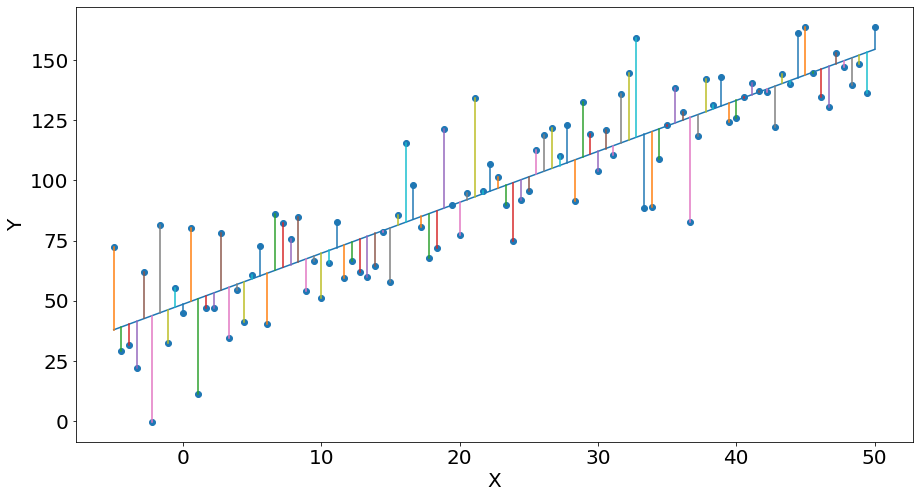

In [19]:
fig = plt.figure(figsize=(15,8))
#get the axis
ax = fig.gca()

ax.scatter(x=data['x'], y=data['y'])
ax.plot(data['x'], data['y_cap'])
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
for index, row in data.iterrows():
    ax.plot((row['x'], row['x']),
           (row['y'], row['y_cap']))
ax.tick_params(axis='both', labelsize=20)

In [20]:
for index, row in data.iterrows():
    print (row)

x             -5.000000
y             72.486907
base_y        96.211657
y_cap         37.903210
y_y_cap       34.583697
y_y_squr    1196.032088
y_mean        96.211657
Name: 0, dtype: float64
x            -4.444444
y            28.875983
base_y       96.211657
y_cap        39.081159
y_y_cap     -10.205176
y_y_squr    104.145617
y_mean       96.211657
Name: 1, dtype: float64
x           -3.888889
y           31.658787
base_y      96.211657
y_cap       40.259107
y_y_cap     -8.600320
y_y_squr    73.965505
y_mean      96.211657
Name: 2, dtype: float64
x            -3.333333
y            21.873961
base_y       96.211657
y_cap        41.437056
y_y_cap     -19.563095
y_y_squr    382.714677
y_mean       96.211657
Name: 3, dtype: float64
x            -2.777778
y            61.752597
base_y       96.211657
y_cap        42.615004
y_y_cap      19.137593
y_y_squr    366.247464
y_mean       96.211657
Name: 4, dtype: float64
x             -2.222222
y             -0.475218
base_y        96.211657
y_c

#### REMEMBER checking the residuals 是否基本符合正态分布

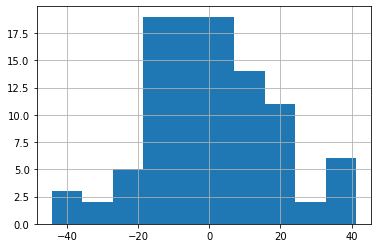

In [21]:
data['y_y_cap'].hist() #quick hist

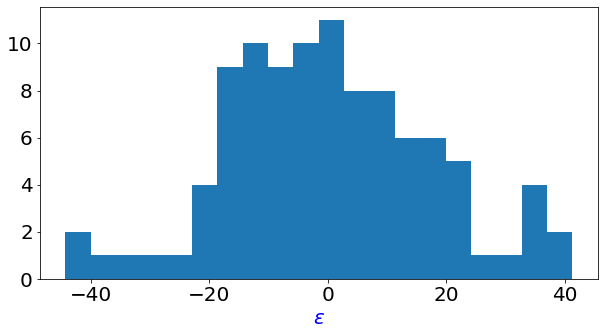

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.hist(data['y_y_cap'], bins=20)
ax.set_xlabel(r'$\epsilon$', fontsize=20, color = 'b')
ax.tick_params(axis='both', labelsize = 20)

In [23]:
np.sum(data['y_y_cap'])

9.805489753489383e-13

In [24]:
np.round(np.sum(data['y_y_cap']),2)  

0.0

#### 再看看x和y的分布

/Users/paxton615/pycharm/projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


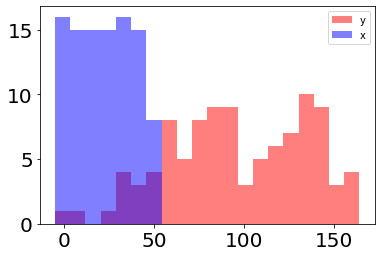

In [25]:
# create a figure
fig = plt.figure()
# get the axis
ax = fig.gca()
ax.hist(([data['x'], data['y']]), label=['x', 'y'], bins=20,
        color='br', histtype='stepfilled', alpha=0.5)
ax.legend()
ax.tick_params(axis='both', labelsize=20)

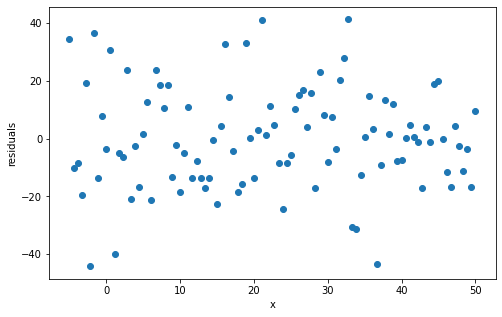

In [26]:
# check for dependence between predictor variable and residuals
fig = plt.figure(figsize=(8,5))
plt.scatter(data['x'],data['y_y_cap'])
plt.xlabel('x')
plt.ylabel('residuals')
plt.show()

## 突然懂了R2的意义, 它表示模型能解释的数据关系程度,所以越大越好
## 对比MSE，它是错误平方的平均（平均错误）,当然越小越好
https://blog.csdn.net/Jesszen/article/details/81017669

https://blog.csdn.net/u012735708/article/details/84337262?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.edu_weight&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.edu_weight

In [27]:
# mse公式
def mean_squared_error(residuals):
    return np.mean(residuals**2)

# R2公式
def calculate_r2(y, yhat):
    ss_res = np.sum((y - yhat)**2)  #rss
    ss_tot = np.sum((y-np.mean(y))**2)  #tss
    r2 = 1-ss_res/ss_tot
    return r2

# MLR参数估计

## Fitting multiple linear regression

---

We extend the linear regression model by making predictions based on multiple predictors.
Each of the predictors has its own beta coefficient:

$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

Note that we could write the same relation as 

$$
\hat{y} = \beta_0\cdot 1 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

We could write this in compact matrix notation as

$$\hat{y} = X\beta$$

The first column of $X$ then contains a 1 in each row.

We will still determine the beta coefficients according to the ordinary least squared principle, i.e. by minimizing the sum of squared residuals.

#### 因为特征可以简化成线性好处理的方式，所有可用下式求解beta

### Obtaining the $\beta$ coefficients

$\beta$ is obtained with the linear algebra formula

$$ \beta = (X^T X)^{-1}X^T y $$

where $X^T$ is the transposed matrix of the original matrix $X$ and $(X^T X)^{-1}$ is the inverse matrix of $X^T X$.

Given the data matrix and the target variable, we can calculate the beta coefficients by forming a few dot-products.

### We want to minimize the residual sum of squares:

$$RSS = \sum_{i=1}^n(y_i-(\beta_0+\beta_1 X_{i1}+\beta_2 X_{i2}+\ldots+\beta_p X_{ip}))^2 
= \sum_{i=1}^n\left(y_i-\sum_{j=1}^p X_{ij}\beta_j\right)^2 $$

This can be read as

$$RSS = \sum_{i=1}^n \epsilon_i^2 = \epsilon^T \epsilon = (y-X\beta)^T(y-X\beta)
= y^T y - \beta^T X^T y - y^T X \beta + \beta^T X^T X\beta$$


Since we want to minimize the RSS, we take the derivative with respect to $\beta$:

$$ \frac{\partial RSS}{\partial \beta} = 
-2X^Ty + 2X^T X\beta$$

Then we set this derivative equal to zero and solve for $\beta$ (i.e. all its components):

$$ 
\begin{eqnarray*}
0 &=& -2X^Ty + 2X^TX\beta \\
X^TX\beta &=& X^Ty \\
\beta &=& (X^TX)^{-1}X^Ty
\end{eqnarray*}
$$

In [28]:
house_csv = '/Users/paxton615/GA/resource-datasets/housing_data/housing-data.csv'
df = pd.read_csv(house_csv)
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [29]:
df['price'] = df.price.map(lambda x: x/1000.)
df.head(2)

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9


In [30]:
X = df[['sqft', 'bdrms', 'age']].copy()
X['intercept'] = 1.
y = df.price
X.head()

,sqft,bdrms,age,intercept
0,2104,3,70,1.0
1,1600,3,28,1.0
2,2400,3,44,1.0
3,1416,2,49,1.0
4,3000,4,75,1.0


### Solve for the beta coefficients

We are still predicting `price`. Implement the linear algebra equation to solve for the beta coefficients. 

$$ \beta = (X^T X)^{-1}X^T y $$

**Tips:**

The transpose of a matrix is calculated by appending `.T` to the matrix:

    X.T

Matrix multiplication in the formula should be done with the "dot product":

    np.dot(mat1, mat2)

Inverting a matrix is done using:

    np.linalg.inv()

# 矩阵乘法不能简单用 * 号

In [31]:
beta_vec = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) # 算出各项feature的系数
print(beta_vec)

[ 1.39334847e-01 -8.62147046e+00 -8.12178776e-02  9.24516278e+01]


#### Calculate the predicted $\hat{y}$ with your $X$ predictor matrix and $\beta$ coefficients.

# 矩阵乘法不能简单用 * 号

In [32]:
yhat = np.dot(X, beta_vec) # 得到模型的预测值
np.round(yhat,3)

array([354.062, 287.249, 397.417, 268.527, 469.879, 329.591, 279.352,
       260.789, 257.732, 273.535, 327.707, 343.064, 326.275, 669.306,
       238.553, 372.182, 254.095, 232.47 , 421.084, 478.584, 309.218,
       331.857, 289.024, 327.036, 605.676, 214.982, 267.382, 417.491,
       370.85 , 431.983, 328.197, 222.759, 336.117, 498.239, 308.352,
       262.75 , 237.436, 352.754, 639.902, 355.715, 303.813, 375.414,
       411.009, 227.616, 188.237, 310.816, 233.314])

与实际值做对比：

In [33]:
np.array(y) # 实际值

array([399.9  , 329.9  , 369.   , 232.   , 539.9  , 299.9  , 314.9  ,
       198.999, 212.   , 242.5  , 239.999, 347.   , 329.999, 699.9  ,
       259.9  , 449.9  , 299.9  , 199.9  , 499.998, 599.   , 252.9  ,
       255.   , 242.9  , 259.9  , 573.9  , 249.9  , 464.5  , 469.   ,
       475.   , 299.9  , 349.9  , 169.9  , 314.9  , 579.9  , 285.9  ,
       249.9  , 229.9  , 345.   , 549.   , 287.   , 368.5  , 329.9  ,
       314.   , 299.   , 179.9  , 299.9  , 239.5  ])

### Write a function to calculate $R^2$. Print out the $R^2$ of your model.

In [34]:
def calculate_r2(y, yhat):  # 这个function也是R2的定义
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r2 = 1-ss_res/ss_tot
    return r2

In [35]:
print('Multiple regression R^2:', calculate_r2(y, yhat))

Multiple regression R^2: 0.7331639990690024


#### Check the distribution of the residuals

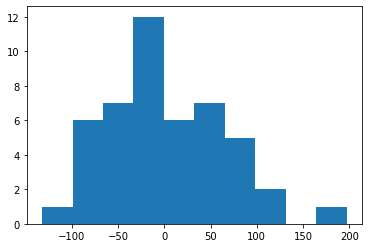

In [36]:
(y-yhat).hist(bins=10, grid=False);

#### Check for relations between predictor values and residuals

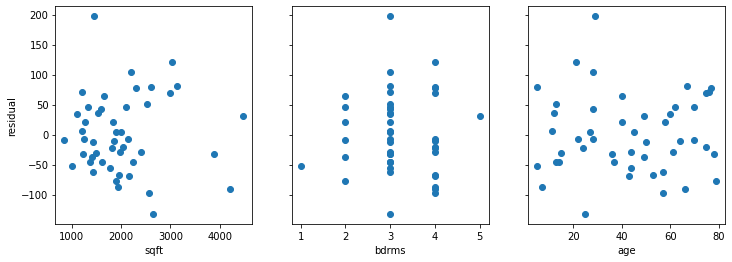

In [37]:
fig, ax = plt.subplots(ncols=3,figsize=(12,4),sharey=True)
for i, col in enumerate(X.columns[:3]):
    ax[i].scatter(X[col],(y-yhat))
    ax[i].set_xlabel(col)
ax[0].set_ylabel('residual')
plt.show()

## Conclusions

- With MLR we can fit more complex models
- We can take more information into account
    - by including more predictors
    - by modeling more complicated relationships between target and predictor variables
- We implemented the relevant formulas by hand
- From now on we will rely on implementation in machine learning libraries

## Common metrics for evaluating regression models

---

The [root mean squared error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is a standard measure of model performance. It is the square root of the mean of the sum of squared residuals:

$$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n({y_i} - \hat{y}_i)^2} $$

The smaller the root mean squared error, the better your model fits the data. 

The $R^2$ score is

$$ R^2 = 1 - \frac{SS_{\rm res}}{SS_{\rm tot}} $$

where the residual sum of squares is the sum of squared residuals for our model:

$SS_{\rm res}=\sum_i ({y}_i -\hat{y})^2$

and the total sum of squares is the sum of squared residuals for the *baseline* model (which just predicts the mean of the outcome variable, i.e. $\hat{y}$): 

$SS_{\rm tot} = \sum_i (y_i-\bar{y})^2$

This is essentially the variance of our target.

$R^2$ is the most common metric to evaluate a regression and is the default scoring measure in sklearn. When we cover classification models, the `.score` function instead defaults to accuracy.

## A note on negative $R^2$ values

---

Over the course of this class you will encounter negative $R^2$ values. This may seem impossible, and it is in the standard scenario where we are calculating the $R^2$ score on the data we fit the model with.

However, if you fit your model on one sample of data, *then score the model on new data not used to fit the model*, it is possible to end up with negative $R^2$.

**What does it mean to have a negative $R^2$?**

Remember that $R^2$ is 1 minus the error of your regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

We will return to the topic of negative $R^2$ when we talk about training and testing sets and cross-validation.


In [39]:
# from sklearn.metrics import mean_squared_error
# print(np.sqrt(mean_squared_error(target, predictions)))

# score  =  model.score(X, y)
# print("R2-score: ", score)

赌博是期望值的一种常见应用。例如，美国的轮盘中常用的轮盘上有38个数字，每一个数字被选中的概率都是相等的。赌注一般押在其中某一个数字上，如果轮盘的输出值和这个数字相等，那么下赌者可以获得相当于赌注35倍的奖金（原注不包含在内），若输出值和下压数字不同，则赌注就输掉了。考虑到38种所有的可能结果，然后这里我们的设定的期望目标是“赢钱”，则因此，讨论赢或输两种预想状态的话，以1美元赌注押一个数字上，则获利的期望值为：赢的“概率38分之1，能获得35元”，加上“输1元的情况37种”，结果约等于-0.0526美元。也就是说，平均起来每赌1美元就会输掉0.0526美元，即美式轮盘以1美元作赌注的期望值为负0.0526美元。

In [41]:
((35*1/38) + (-1* 37/38))

-0.052631578947368474

In [42]:
1/38*(-2)

-0.05263157894736842

In [44]:
lst1 = ['North','South','East','West']
lst2 = ['North','West','South','East']

In [54]:
lst1.sort() == lst2.sort()

True

In [61]:
def where2go(lst):
    
    fullset = ['North','South','East','West']
    lst1 = []
    lst2 = []
    for i in lst:
        if i not in lst1:
            lst1.append(i)
        else:
            lst2.append(i)
#         if lst1.sort() == fullset.sort():
#             lst1 = []
    return(lst1,lst2)

In [62]:
where2go(["NORTH", "SOUTH", "SOUTH", "EAST", "WEST", "NORTH", "WEST"])

(['NORTH', 'SOUTH', 'EAST', 'WEST'], ['SOUTH', 'NORTH', 'WEST'])

In [80]:
lst = ["NORTH", "SOUTH", "SOUTH", "EAST", "WEST", "NORTH", "WEST"]

In [123]:
nlst = []
count = 0
while count < 5:
    nlst.append(lst[count])
    count += 1


In [124]:
count

5

In [125]:
print(nlst)
print(len(nlst))

['NORTH', 'SOUTH', 'SOUTH', 'EAST', 'WEST']
5


In [77]:
len(lst)

7

In [126]:
EF = np.dot([[1,0,0],[-5,1,0],[0,0,1]], [[1,0,0],[0,1,0],[0,-4,1]])

array([[ 1,  0,  0],
       [-5,  1,  0],
       [ 0, -4,  1]])

In [130]:
FE = np.dot([[1,0,0],[0,1,0],[0,-4,1]],\
            [[1,0,0],[-5,1,0],[0,0,1]])
FE

array([[ 1,  0,  0],
       [-5,  1,  0],
       [20, -4,  1]])

In [131]:
np.linalg.inv(FE)

array([[1., 0., 0.],
       [5., 1., 0.],
       [0., 4., 1.]])

In [132]:
np.dot([[1,0],[3,1]], [[2,1],[0,5]])

array([[2, 1],
       [6, 8]])

In [ ]:
#可以再重新看一下residuals的linear algebra的推导过程